In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import itertools

%matplotlib inline
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
tf.__version__

'2.1.0'

<IPython.core.display.Javascript object>

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

<IPython.core.display.Javascript object>

In [4]:
x_train = x_train / 255
x_test = x_test / 255

<IPython.core.display.Javascript object>

In [5]:
class_names = np.unique(y_train)

<IPython.core.display.Javascript object>

In [6]:
def create_model()->keras.models.Model():
    
    model = keras.Sequential()
    model.add(keras.layers.Flatten())

    model.add(keras.layers.Dense(units=512, activation='relu'))
    model.add(keras.layers.Dense(units=256, activation='relu'))
    model.add(keras.layers.Dense(units=len(class_names), activation='softmax'))
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model


<IPython.core.display.Javascript object>

In [7]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy',
    min_delta=0.01, patience=4, verbose=2, restore_best_weights=True
)


<IPython.core.display.Javascript object>

In [8]:
model = create_model()

<IPython.core.display.Javascript object>

In [9]:
model.fit(
    x_train,
    y_train,
    epochs=50,
    validation_split=0.1,
    batch_size=256,
    callbacks=[early_stopping],
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 1s 20us/sample - loss: 0.2943 - accuracy: 0.9145 - val_loss: 0.1129 - val_accuracy: 0.9700
Epoch 2/50
54000/54000 [==============================] - 1s 16us/sample - loss: 0.1018 - accuracy: 0.9696 - val_loss: 0.0820 - val_accuracy: 0.9775
Epoch 3/50
54000/54000 [==============================] - 1s 16us/sample - loss: 0.0650 - accuracy: 0.9807 - val_loss: 0.0749 - val_accuracy: 0.9778
Epoch 4/50
54000/54000 [==============================] - 1s 17us/sample - loss: 0.0458 - accuracy: 0.9864 - val_loss: 0.0701 - val_accuracy: 0.9815
Epoch 5/50
54000/54000 [==============================] - 1s 16us/sample - loss: 0.0304 - accuracy: 0.9907 - val_loss: 0.0684 - val_accuracy: 0.9822
Epoch 6/50
54000/54000 [==============================] - 1s 17us/sample - loss: 0.0212 - accuracy: 0.9939 - val_loss: 0.0674 - val_accuracy: 0.9827
Epoch 7/50
54000/54000 [==============================] -

<IPython.core.display.Javascript object>

In [10]:
evaluation_results = model.evaluate(x_test, y_test, verbose=0)

<IPython.core.display.Javascript object>

In [11]:
evaluation_results

[0.0707536816113512, 0.9779]

<IPython.core.display.Javascript object>

In [12]:
index = 88

model.predict_classes(x_test[index].reshape(1, 28, 28))[0]

6

<IPython.core.display.Javascript object>

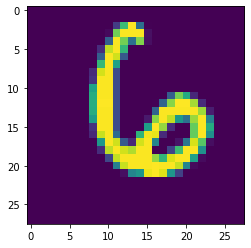

<IPython.core.display.Javascript object>

In [13]:
plt.imshow(x_test[index])
plt.show()